# Digging Into Deep Time and Deep Cover

<a href="https://doi.org/10.5281/zenodo.3875779"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.3875779.svg" align="right" alt="doi: 10.5281/zenodo.3875779" style="padding: 0px 10px 10px 0px"></a>
<a href="https://github.com/morganjwilliams/gs2020-diggingdeeper/blob/master/LICENSE"><img src="https://img.shields.io/badge/License-MIT-blue.svg" align="right" alt="License: MIT" style="padding: 0px 10px 10px 0px"></a>




<span id='authors'><b>Morgan Williams <a class="fa fa-twitter" aria-hidden="true" href="https://twitter.com/metasomite" title="@metasomite"></a></b>, Jens Klump, Steve Barnes and Fang Huang; </span>
<span id='affiliation'><em>CSIRO Mineral Resources</em></span>


### Contents


| [**Abstract**](./00_overview.ipynb) | **Introduction**                                                    | [**Examples**](./00_overview.ipynb#Examples)            | [**Tools**](./00_overview.ipynb#Tools) | [**Insights**](./00_overview.ipynb#Insights) |
|:-----|:-----|:-----|:-----|:-----|
|  | [Minerals Exploration](./00_overview.ipynb#Mineral-Exploration)  | [Classification](./011_classification.ipynb) |  |  |
|  | [Data Driven Geochem](./00_overview.ipynb#Data-Driven-Geochemistry) | [Regression](./012_regression.ipynb) |  |  |
|  |  | [Data Exploration](./013_dataexploration.ipynb) | |  |


## Classification

* Classifcation as a 2D graphical problem throughout history
* Classification linked to genesis or physics/chemistry of the problem (e.g. Pearce)


Geochemists love classifying, binning and 'butterfly collecting', but how many of these divisions make sense in the natural world (e.g. consider the Total Alkali - Silica diagram)?  In this case a data driven approach instead considers divisions according to the natural clustering of data, where they exist.


**Key Messages**:
* Use the dimensionality you have
* Try to visualise and understand what's happening in lower dimensional spaces
* Where available, use metrics to understand estimated uncertainty and confidence

### Quantifying Geochemical Context

Context is particularly important for geochemistry, as it's often expressed in relative terms. It's most useful when you have something else to compare it to.

* We discuss 'enrichment' and 'depletion', relative to some reference point.

* We normalize trace element chemistry to 'chondrite', 'primitive mantle' or 'MORB' to visualize the *relative* effects of geological processes
    * *'Let's ignore the effects of nucleosynthesis and planet formation for now..'*

* We use the term 'signature' to refer to the affinity or 'flavour' of geochemical compositions (e.g. MORB, E-MORB, N-MORB, 'Chondritic')

What we infer based on our geochemistry is commonly based on:
* local changes or gradients (e.g. alteration halos, mineral zoning),  or
* similarity to some reference composition (e.g. basalts with 'ocean island basalt signatures'). 

In both of these instances, we express geochemistry relative to some reference point, but the relationship between our data and these reference compositions could often be better quantified. 

To highlight some of these issues, consider the second case, which is related to the problem of tectonic discrimination (which will come up a bit later):

* What is an 'ocean island basalt signature'?
    * *Ocean island basalts have a range of compositions, do you take the average? Median?*
    * *How close does it have to be to have an 'ocean island basalt signature'?*

* What if it also has an 'oceanic plateau' like signature?
    * *What's the probability that this is an ocean island basalt?*
    * *With what confidence can you say that this is an ocean island basalt, and not an oceanic plateau?*
    * *If you had analyzed more elements, would you have the same confidence in the 'OIB signature'?*

### Beyond Three Dimensions: Multidimensional Analysis

One of the historical limitations for geochemistry has been the need to graphically represent data in 2D.
* This has limited how we approach solving geochemical problems.
* Multidimensional geochemical data analysis can overcome previous human-centric limitations and inaccuracies.

#### Trace Element Discrimination Diagrams

* Pearce's Th-Yb-Nb diagram offers some insight into the issues with using 2D classification schemes.

<div class="row">
<div class="column">
    <img src="../img/Smithies2018Fig1.png" width="35%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>
    </div>
<div class="column">
    <img src="../img/Li2015Fig9.png" width="35%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>
    </div>
</div> 


* The significant degree of overlap in these two dimensions between different tectonic settings renders this approach futile for generalised discrimination.

Figures from [Smithies (2018)] after [Pearce (2008)], and [Li et al. (2015)]).

[Li et al. (2015)]: https://doi.org/10.1016/j.lithos.2015.06.022 "Li, C., Arndt, N.T., Tang, Q., Ripley, E.M., 2015. Trace element indiscrimination diagrams. Lithos 232, 76–83. "

[Smithies (2018)]: https://doi.org/10.1016/j.epsl.2018.01.034 "Smithies, R.H., Ivanic, T.J., Lowrey, J.R., Morris, P.A., Barnes, S.J., Wyche, S., Lu, Y.-J., 2018. Two distinct origins for Archean greenstone belts. Earth and Planetary Science Letters 487, 106–116."

[Pearce (2008)]: https://doi.org/10.1016/j.lithos.2007.06.016 "Pearce, J.A., 2008. Geochemical fingerprinting of oceanic basalts with applications to ophiolite classification and the search for Archean oceanic crust. Lithos 100, 14–48."

Classification with major elements - use compositional data analysis

## Example:<br>Machine Tectonic Discrimination

Machine clasification models used for tectonic discrimination using bulk-rock geochemical data include support vector classifiers, random forests and sparse multinomial regression ([Petrelli2016], [Ueki2018]). Here we'll rebuild one of the support vector classifiers.



[Petrelli2016]: https://doi.org/10.1007/s00410-016-1292-2 "Petrelli, M., Perugini, D., 2016. Solving petrological problems through machine learning: the study case of tectonic discrimination using geochemical and isotopic data. Contrib Mineral Petrol 171, 81."
[Ueki2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

In [1]:
import pandas as pd
import pyrolite.geochem
import pyrolite.plot
import matplotlib.pyplot as plt

df = pd.read_csv("https://storage.googleapis.com/aegc2019/ueki2018.csv")
df.pyrochem.add_ratio("Th/Yb")
df.pyrochem.add_ratio("Nb/Yb");

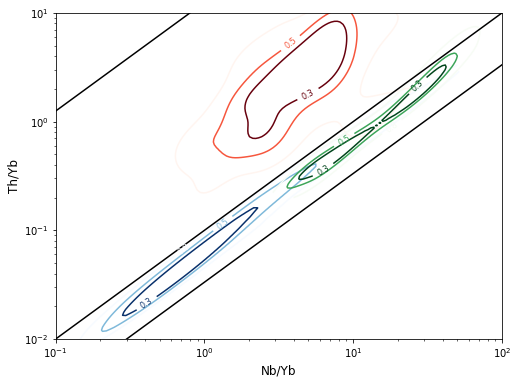

In [2]:
from pyrolite.plot.templates.pearce import pearceThNbYb

fig, ax = plt.subplots(1, figsize=(8, 6))
pearceThNbYb(ax)
lims = ax.axis()
ax = df.loc[(df.Class == "MOR"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Blues"
)

df.loc[(df.Class == "CA"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Reds"
)

df.loc[(df.Class == "OI"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Greens"
)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from pyrolite.geochem.ind import common_elements, common_oxides

from pyrolite.util.skl.vis import plot_confusion_matrix
from pyrolite.util.skl.pipeline import SVC_pipeline
from pyrolite.util.skl.transform import CLRTransform

Here we'll use the 29-dimension tectonic discrimination dataset (majors, minors, traces and isotopes) from Ueki et al. (2018), modified to list the specific tectonic setting in a 'Class' column. 

Tectonic setting classes are as follows:  BAB: Back Arc Basin, CA: Continental Arc, CFB: Continental Flood Basalt, IA: Island Arc, IOA: Intra-oceanic Arc, MOR: Mid-Ocean Ridge, OI: Ocean Island, OP: Oceanic Plateau.

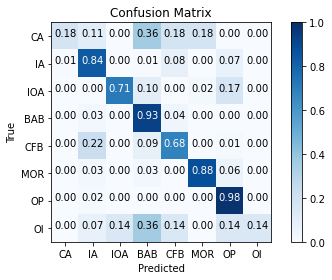

In [4]:
df = pd.read_csv("https://storage.googleapis.com/aegc2019/ueki2018.csv")

abundances = df.pyrochem.list_compositional

classes = list(df.Class.unique())
X, y = df.loc[:, abundances], df["Class"]
scaler = StandardScaler()
X_ = scaler.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, normalize=True, classes=classes)


In [5]:
scaler = StandardScaler()
XX_ = scaler.fit_transform(CLRTransform().fit_transform(X))
XX_train, XX_test, yy_train, yy_test = train_test_split(
    XX_, y, stratify=y, test_size=0.3
)
gs = SVC_pipeline(
    verbose=1,
    probability=True,
    param_grid=dict(
        svc__gamma=np.logspace(-2.3, -0.85, 5),
        svc__C=np.logspace(-0.5, 2, 5),  # limit C parameter to avoid overfitting
    ),
)
gs.fit(XX_train, yy_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   23.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('svc',
                                        SVC(C=1.0, cache_size=500,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovo',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=4,
             param_grid={'svc__C': array([  0.31622777,   1.33352143,   5.62341325,  23.71373706,
       100.        ]),
   

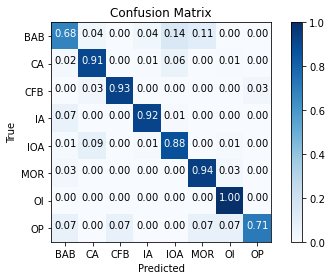

In [6]:
plot_confusion_matrix(gs.best_estimator_, XX_test, yy_test, normalize=True)

In [7]:
probs = (
    pd.DataFrame(
        data=gs.best_estimator_.predict_proba(XX_test[:8]),
        columns=gs.best_estimator_.classes_,
    )
    * 100
)
probs["Expect"] = yy_test[:8].tolist()
table = probs[probs.columns[::-1]].round(2)
table.style.background_gradient(cmap="Blues", axis=1)

,Expect,OP,OI,MOR,IOA,IA,CFB,CA,BAB
0,OI,0.150000,98.430000,0.320000,0.250000,0.180000,0.130000,0.370000,0.170000
1,CA,0.000000,0.000000,0.000000,0.570000,0.070000,0.010000,99.240000,0.110000
2,CA,0.000000,0.000000,0.000000,0.510000,0.030000,0.010000,99.280000,0.160000
3,IA,0.040000,0.020000,0.020000,0.520000,50.910000,0.030000,44.410000,4.050000
4,CFB,0.010000,0.000000,0.280000,0.130000,0.040000,99.370000,0.030000,0.140000
5,CA,0.130000,0.220000,0.160000,1.940000,14.140000,0.430000,82.510000,0.490000
6,CFB,3.700000,8.960000,5.230000,0.320000,0.170000,79.780000,0.950000,0.900000
7,CA,0.120000,0.310000,0.460000,0.670000,0.340000,0.610000,94.140000,3.330000


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyrolite.util.skl.pipeline import SVC_pipeline
from pyrolite.util.skl.vis import plot_mapping
from pyrolite.util.plot import DEFAULT_DISC_COLORMAP

In [9]:
from pyrolite.util.skl.transform import CLRTransform
df = pd.read_csv('https://storage.googleapis.com/aegc2019/ueki2018.csv')
classes = {c: ix for ix, c in enumerate(df.Class.unique())}
X, y = CLRTransform().transform(df.loc[:, [i for i in df.columns if i != "Class"]]), df["Class"]
y = y.apply(lambda x: classes[x]) # turn these into integers for the colormap
svc = SVC_pipeline(probability=True, scaler=StandardScaler(), kernel='rbf')
gs = svc.fit(X, y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.7s finished


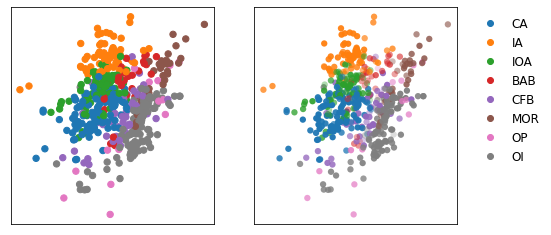

In [10]:
from pyrolite.util.plot.legend import proxy_line

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))

xsample = X.sample(500)
s=40

a, tfm, mapped = plot_mapping(
    xsample, 
    gs.best_estimator_, 
    ax=ax[1], 
    s=s,
    init="pca"
)
ax[0].scatter(*mapped.T, c=DEFAULT_DISC_COLORMAP(gs.predict(xsample)), s=s)

ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].legend([proxy_line(c=DEFAULT_DISC_COLORMAP(ix), ls='none', marker='o') for c, ix in classes.items()], 
             [c for c in classes.keys()], 
             bbox_to_anchor=(1.05, 1.0), 
             loc='upper left', 
             frameon=False, 
             fontsize=12);


UMAP Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique which can be used in a very similar way to other manifold methods within scikit-learn (McInnes2018), with the added flexibility of being able transform new/novel data. This is particulary useful for visualising training and testing data together, but can also be applied to map reference compositions and boundaries into the projected space. UMAP can also be used for semi-supervised and supervised dimensional reduction and metric learning, but this is beyond the scope of these notebooks. The technique is based on a specific set of assumptions which may be violated in practise, but it remains effective for the uses described here.

[McInnes2018]:  https://doi.org/10.21105/joss.00861 "McInnes, L., Healy, J., Saul, N., Grossberger, L., 2018. UMAP: uniform manifold approximation and projection.  The Journal of Open Source Software 3, 861."

In [ ]:
import umap.umap_ as umap  # required in case of umap install errors

reducer = umap.UMAP(metric='mahalanobis', min_dist=0.1, n_neighbors=30)
embedding = reducer.fit_transform(X)

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

ax.scatter(*embedding.T, 
           c=DEFAULT_DISC_COLORMAP(gs.predict(X)),
           s=s)
ax.set_xticks([])
ax.set_yticks([])

ax.legend([proxy_line(c=DEFAULT_DISC_COLORMAP(ix), ls='none', marker='o') for c, ix in classes.items()], 
          [c for c in classes.keys()],
          bbox_to_anchor=(1.05, 1.0), 
          loc='upper left', 
          frameon=False, 
          fontsize=12);

You can also change the number of components, for example to generate 3D figures:

In [ ]:
threeDreducer = umap.UMAP(n_components=3, metric='mahalanobis', n_neighbors=50)
threeDembedding = threeDreducer.fit_transform(X)

In [ ]:
from pyrolite.util.skl.vis import alphas_from_multiclass_prob

c = DEFAULT_DISC_COLORMAP(gs.predict(X)) # predicted classes
ps = gs.predict_proba(X) # probabilities
c[:, -1] = alphas_from_multiclass_prob(ps, alpha=0.95) # append alphas to RGBA colours

In [ ]:
import ipyvolume as ipv

fig = ipv.quickscatter(*threeDembedding.T,
                 color=c,
                 size=2, 
                 marker='sphere')


------

### Index

| [**Abstract**](./00_overview.ipynb) | **Introduction**                                                    | [**Examples**](./00_overview.ipynb#Examples)            | [**Tools**](./00_overview.ipynb#Tools) | [**Insights**](./00_overview.ipynb#Insights) |
|:-----|:-----|:-----|:-----|:-----|
|  | [Minerals Exploration](./00_overview.ipynb#Mineral-Exploration)  | [Classification](./011_classification.ipynb) |  |  |
|  | [Data Driven Geochem](./00_overview.ipynb#Data-Driven-Geochemistry) | [Regression](./012_regression.ipynb) |  |  |
|  |  | [Data Exploration](./013_dataexploration.ipynb) | |  |
